In [1]:
# importing packages
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000 #handy for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [2]:
import os
os.chdir("C:/Users/sutsa/")

In [3]:
# importing data
dating = pd.read_csv("speed/Speed Dating Data.csv", encoding="ISO-8859-1") # use this encoding, funky error otherwise. thanks kagglers!
dating.head(5)



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# counting null values
dating.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

Data Cleaning and EDA

From the peek at the data we had above, there are a ton of fields with NaNs. A lot of NaNs. There are 8,378 rows and a bunch of fields have thousands of NaNs and probably bad practice to use imputation to guess the values. Instead, I'll just disregard these fields with over 4000 null values from the dataset and narrow my analysis to the fields that I can use. First though, let's take a look at some totals before we throw out some fields and rows due to missing values.

Text(0, 0.5, 'Frequency')

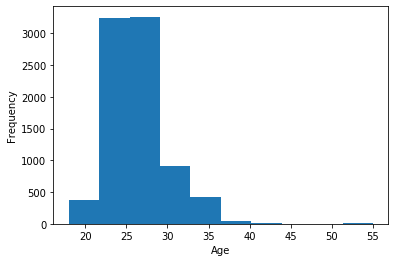

In [5]:
# age distribution of participants
age = dating[np.isfinite(dating['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

So most of the participants were in their mid twenties to early thirties.

In [6]:
# out of curiosity, I want to see how many speed daters found a match!
pd.crosstab(index=dating['match'],columns="count")

col_0,count
match,
0,6998
1,1380


It looks like only about 20% of people found themselves a second date after the speed dating session!

In [7]:
# narrowing dataset
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

date = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [8]:
# counting null values
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [9]:
# removing null rows now that the nulls are in the hundreds and not the thousands
date2 = date.dropna()

In [10]:
# checking datatypes
date2.dtypes

iid           int64
gender        int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
race        float64
imprace     float64
imprelig    float64
from         object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64
shopping    float64
yoga        float64


In [11]:
# creating an object-free dataframe for later use
date3 = date2.drop(['field', 'from', 'career'], axis=1)

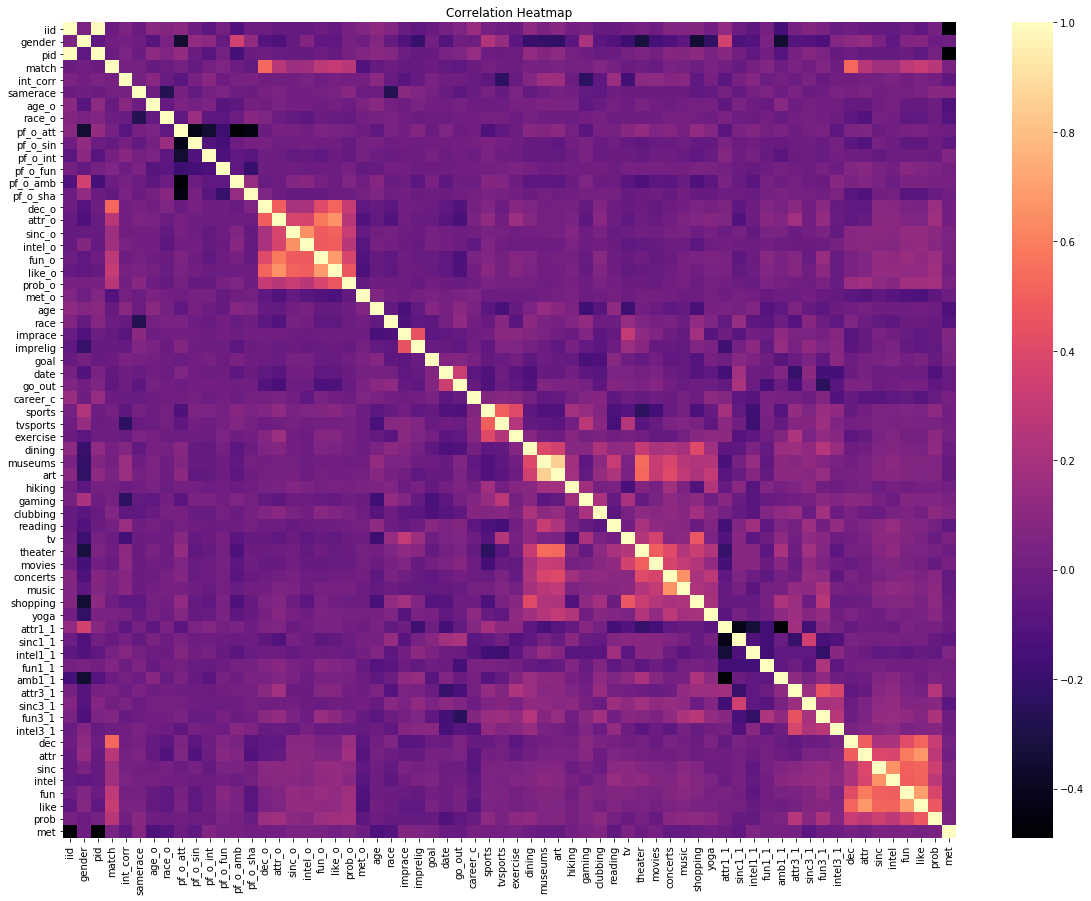

In [12]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='magma')

In looking at the heatmap above, there are some interesting observations.

For example, men (gender = 1) seem to have a preference for attractive partners (attr1_1) while women (gender = 0) seem to have a preference for ambitious partners (amb1_1)!

In other news, women like shopping and yoga and men like gaming, so at least we know this heatmap is working. Let's look into the interests some more!

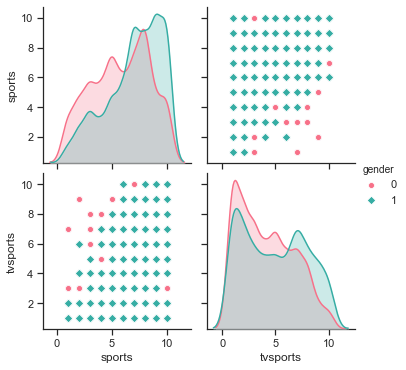

In [14]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 30:32]],axis = 1)

g = sns.pairplot(date_int, hue="gender",markers=["o", "D"],palette="husl",vars=date_int.columns[1:])

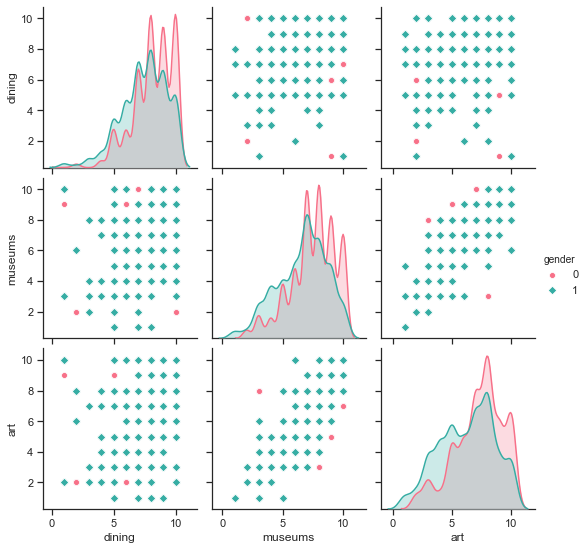

In [15]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int1 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(date_int1, hue="gender",markers=["o", "D"],palette="husl",vars=date_int1.columns[1:])

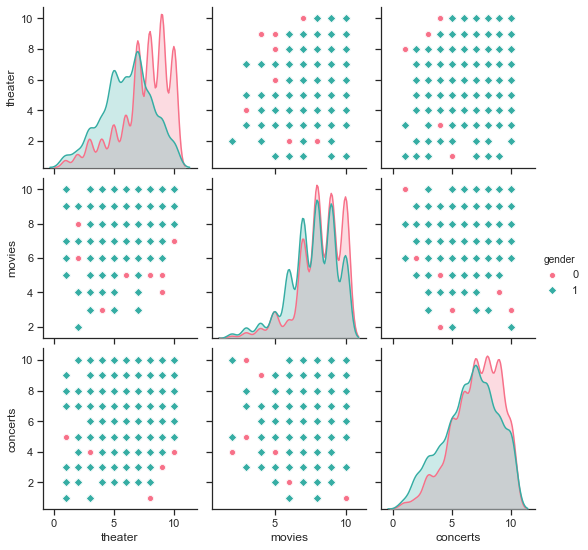

In [16]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int2 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 41:44]],axis = 1)
g = sns.pairplot(date_int2, hue="gender",markers=["o", "D"],palette="husl",vars=date_int2.columns[1:])

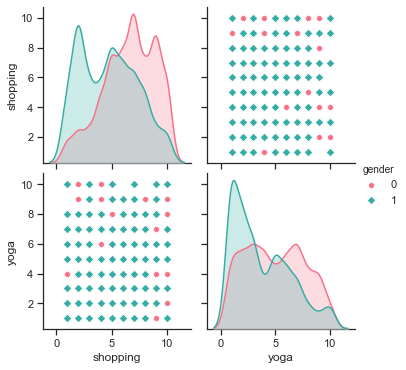

In [17]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int3 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 45:47]],axis = 1)
g = sns.pairplot(date_int3, hue="gender",markers=["o", "D"],palette="husl",vars=date_int3.columns[1:])


Just for fun, I wanted to see how interests differed by gender. The histograms above show that if you want to suggest a date that both genders are likely to enjoy, choose movies or dining!

However, referring back to the heatmap none of the interests really correlated with match, so that gives me the go-ahead to remove interests from my match prediction model!

It also looks like match (the variable we are interested in) is mostly correlated to the decisions of the partners, and the partner's attributes (how well they rated the partner's attractiveness, sincerity, intelligence, fun, ambition, and how much they liked them).

Interestingly, match was not correlated to age or race, or even how similar the participant and partner's interests are (int_corr)! Love does not discriminate according to the data!

In [18]:
# removing interests
date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

Going along investigating further gender differences, I wonder... how many of each gender are there and does that affect the other person's decision? That is, do women receive more positive final decisions from the other person (dec_o) than men do?

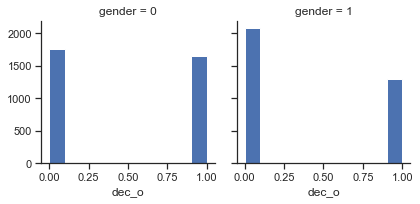

In [19]:
g = sns.FacetGrid(date4, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

In [20]:
# chi-square test
gender_crosstab = pd.crosstab(index=date4.gender, columns=date4.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_rslt = gender_table.test_nominal_association()
gender_rslt.pvalue

1.1102230246251565e-16

It looks like women received about 1750 'no' and about 1600 'yes' for the decision question "Would you like to see him or her again?". Men received about 2050 'no' and about 1300 'yes'. In other words, men are more likely to be rejected by women than women are to be rejected by men (wahwah). This is a statistically significant difference as confirmed by the above chi-squared test p-value. Poor guys!

Now, I wonder, how many interactions were unrequited love? That is, getting the count of rows where dec_o = 1 AND dec = 0 OR a dec = 1 AND dec_o = 0?

In [21]:
# unrequited love count
no_love_count = len(date4[(date4['dec_o']==0) & (date4['dec']==1)]) 
+ len(date4[(date4['dec_o']==1) & (date4['dec']==0)])
perc_broken_heart = no_love_count / len(date4.index)
perc_broken_heart*100

26.040900397234072

So it seems 26% of participants unfortunately had their heart broken. More than the percentage of people who got a second date!

On an unrelated note, I wonder if the incidence of unrequited love differs by the attractiveness of the partner.

In [22]:
# encoding unrequited love as a new column
date4['url']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)

Text(0.5, 0, 'Broken Heart')

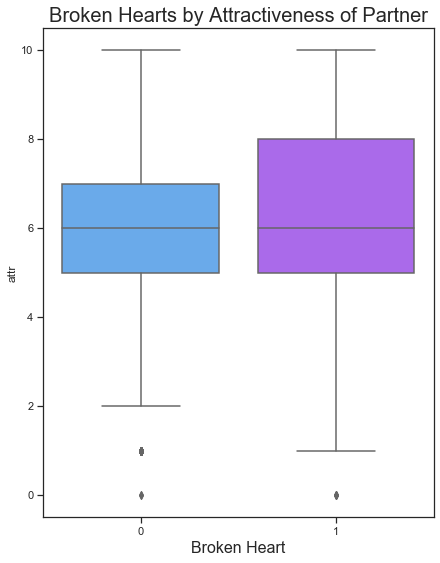

In [23]:
# looking at url by attractiveness
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='attr', data=date4, palette='cool')
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)

In [24]:
# chi-square test
bh_crosstab = pd.crosstab(index=date4.attr, columns=date4.url)
bh_table = sm.stats.Table(bh_crosstab)
bh_rslt = bh_table.test_nominal_association()
bh_rslt.pvalue

0.5300021303134917

Looks like the difference in attractiveness was not statistically significant. So the good news is, the likelihood of getting rejected is not dependent on your attractiveness!

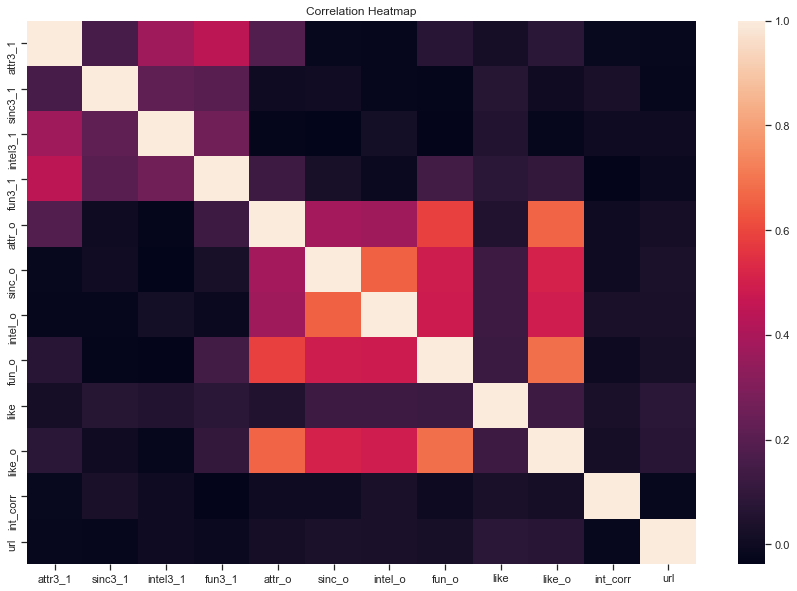

In [25]:
date5 = pd.concat([date4['attr3_1'],date4['sinc3_1'],date4['intel3_1'],date4['fun3_1'],date4['attr_o'],
                   date4['sinc_o'],date4['intel_o'],date4['fun_o'],date4['like'],date4['like_o'], 
                   date4['int_corr'],date4['url']],axis=1)
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date5.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

It looks like regardless of your attractiveness, or any other trait for that matter, you are just as likely to experience heartbreak!

It also looks like typically, your own opinion of how attractive you are (attr3_1) is only weakly correlated with how attractive your date finds you (attr_o)! And in fact, there is nearly no correlation between how smart or sincere you think you are versus how smart and sincere your date thinks of you! Perhaps these are tough qualities to get across in a 4 minute date!

So that brings up the question, between attractiveness, sincerity, intelligence, fun, ambition, and liking, what was the most influential in the final decision (dec)? I'll run a linear regression model.

In [26]:
# OLS model with coefficients
X_ols = date4[['attr','sinc','intel','fun','like','int_corr']]
y_ols = date4.dec
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dec   R-squared (uncentered):                   0.602
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                              1712.
Date:                Thu, 28 May 2020   Prob (F-statistic):                        0.00
Time:                        21:26:02   Log-Likelihood:                         -3686.4
No. Observations:                6797   AIC:                                      7385.
Df Residuals:                    6791   BIC:                                      7426.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.0555      0.004     15.678      0.000       0.049       0.062
sinc          -0.0351      0.004     -8.750      0.000      -0.043      -0.027
intel         -0.0485      0.004    -11.897      0.000      -0.057      -0.041
fun            0.0173      0.004      4.495      0.000       0.010       0.025
like           0.0997      0.004     22.261      0.000       0.091       0.109
int_corr      -0.0366      0.017     -2.210      0.027      -0.069      -0.004
==============================================================================
Omnibus:                     4603.362   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.555
Skew:                           0.072   Prob(JB):                     2.11e-86
Kurtosis:                       1.828   Cond. No.                         50.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It turns out that being intelligent or sincere or having similar interests actually slightly hurts your chances at securing that second date! Don't panic though, this is just from 4 minutes of meeting each other! We might take this as advice to focus on breaking the ice and being more fun and likeable in the first date!

Now let's run an OLS but with both respondents' ratings instead of just one, and this time on match instead of decision (dec).

In [27]:
# OLS model with coefficients
X_ols = date4[['dec','dec_o','attr','attr_o','fun','fun_o','like','like_o','int_corr']]
y_ols = date4.match
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  match   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              1381.
Date:                Thu, 28 May 2020   Prob (F-statistic):                        0.00
Time:                        21:26:06   Log-Likelihood:                         -180.33
No. Observations:                6797   AIC:                                      378.7
Df Residuals:                    6788   BIC:                                      440.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dec            0.4463      0.007     62.145      0.000       0.432       0.460
dec_o          0.4463      0.007     62.417      0.000       0.432       0.460
attr          -0.0013      0.002     -0.584      0.559      -0.005       0.003
attr_o        -0.0009      0.002     -0.406      0.685      -0.005       0.003
fun            0.0006      0.002      0.249      0.803      -0.004       0.005
fun_o          0.0012      0.002      0.555      0.579      -0.003       0.006
like          -0.0161      0.003     -6.132      0.000      -0.021      -0.011
like_o        -0.0170      0.003     -6.523      0.000      -0.022      -0.012
int_corr       0.0036      0.010      0.364      0.716      -0.016       0.023
==============================================================================
Omnibus:                    33151.792   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              814.640
Skew:                           0.256   Prob(JB):                    1.27e-177
Kurtosis:                       1.383   Cond. No.                         51.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the coefficients, it looks like all that really matters is the decision of both participants, and perhaps whether or not they liked one another.

###Modeling - Classification 

In [28]:
# preparing the data
X=date4[['like','dec']]
y=date4['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [29]:
# logistic regression classification model
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.8282140886518301
Validation Accuracy: 0.8279411764705882


Without knowing what the partner's decision is (dec_o), it turns out that given how much the respondent likes the partner and what the respondent's decision is, we have about an 82.5% accuracy in predicting a match on both the training and the validation using logistic regression. This makes sense given that we know only 26% of people were heartbroken -- if you like someone, odds are they will like you back!

Let's try some other models to see if we can get closer to predicting a match.

In [30]:
# random forest model
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.8289497884862976
Validation Accuracy: 0.8279411764705882


In [31]:
# xgboost model
model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.8289497884862976
Validation Accuracy: 0.8272058823529411


XGBoost was ever so slightly less accurate than Random Forest in the validation set. Looks like Random Forest is my champion model.

Conclusion 
Although this was slightly disappointing, it looks like there still is no real answers to the secret of love. It's not interests or hobbies, it's not attractiveness or intelligence or other traits. Really it's just how much someone likes you. Who would have thought?

On the other hand, we did learn a thing or two. To summarize:

Take your date out to the cliche dinner and a movie because both genders are likely to enjoy it
Dating is tougher for men (perhaps women can be more selective?)
More participants experienced unrequited love than those that found love -- so don't feel too bad
People get their heartbroken regardless of their personal traits like attractiveness, so if you strike out, it's not you that is the problem
Your impression of yourself is often wrong
There is no one trait that makes you likeable
Being likeable is important for securing that second date!